In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from pycwt import cwt,xwt,wct,wct_significance,wavelet,Morlet
import matplotlib.dates as mdates
import pandas as pd
import os
from scipy.signal import detrend


In [2]:
# BIOMASS data

In [3]:
path_bm = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/lancos_filter/intraseasonal/"
files_bm = sorted([f for f in os.listdir(path_bm) if f.endswith(".nc")])
ds_bm = xr.open_dataset(path_bm+files_bm[1])

In [4]:
# current data
path_cu = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/rotated_current/"
files_cu = sorted([f for f in os.listdir(path_cu) if f.endswith(".nc")])
ds_cu = xr.open_dataset(path_cu+files_cu[1])

## along shore

The idea is current drives the biomass, so try to find coherence of biomass wrt the current
> 1. There is overlap between the filtered current data and the biomass in the annual band
> 2. Try taking the depth from 30 m and downward , cause there is bad data in top

In [6]:
bm1 = ds_cu.uraw[:,6].values

In [29]:
for i in range(5,31):
    bm1 = ds_bm.BMD[53:2259,i,0,0].values
    cu1 = ds_cu.along[38:2244,i].values
    # detrend the data
    bm_det1 = detrend(bm1) 
    cu_det1 = detrend(cu1)
    coh1,pha1,coi1,freq1,sig951 = wct(bm_det1,cu_det1,dt=4,dj=1/8,J=45,sig=True,significance_level=0.95,wavelet='morlet',cache=False)

    cross_power = np.abs(coh1)**2
    cross_sig = np.ones([1, len(bm1)]) * sig951[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq1

    coh1 = xr.DataArray(
        data=coh1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2244].values})
    sig1 = xr.DataArray(
        data=cross_sig,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2244].values})
    
    coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':ds_bm.AX006[38:2244].values})
    pha1 = xr.DataArray(
        data=pha1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2244].values})

    dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1': sig1,
        'pha1': pha1,
        'coi1': coi1,
    })
#    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/along/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")
    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/along/lagged_15days/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")
     
    print("done for file, ",i-5)


Calculating wavelet coherence significance


100%|███████| 300/300 [00:31<00:00,  9.39it/s]


done for file,  0
Calculating wavelet coherence significance


100%|███████| 300/300 [00:35<00:00,  8.54it/s]


done for file,  1
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.18it/s]


done for file,  2
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.23it/s]


done for file,  3
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.21it/s]


done for file,  4
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.22it/s]


done for file,  5
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.18it/s]


done for file,  6
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.26it/s]


done for file,  7
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.21it/s]


done for file,  8
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.19it/s]


done for file,  9
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.13it/s]


done for file,  10
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.19it/s]


done for file,  11
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.18it/s]


done for file,  12
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.27it/s]


done for file,  13
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.30it/s]


done for file,  14
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.27it/s]


done for file,  15
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.24it/s]


done for file,  16
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.79it/s]


done for file,  17
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.65it/s]


done for file,  18
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.77it/s]


done for file,  19
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.78it/s]


done for file,  20
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.78it/s]


done for file,  21
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.83it/s]


done for file,  22
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.87it/s]


done for file,  23
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.77it/s]


done for file,  24
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.83it/s]


done for file,  25


In [32]:
for i in range(5,31):
    bm1 = ds_bm.BMD[63:2259,i,0,0].values
    cu1 = ds_cu.along[38:2234,i].values
    # detrend the data
    bm_det1 = detrend(bm1) 
    cu_det1 = detrend(cu1)
    coh1,pha1,coi1,freq1,sig951 = wct(bm_det1,cu_det1,dt=4,dj=1/8,J=45,sig=True,significance_level=0.95,wavelet='morlet',cache=False)

    cross_power = np.abs(coh1)**2
    cross_sig = np.ones([1, len(bm1)]) * sig951[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq1

    coh1 = xr.DataArray(
        data=coh1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2234].values})
    sig1 = xr.DataArray(
        data=cross_sig,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2234].values})
    
    coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':ds_bm.AX006[38:2234].values})
    pha1 = xr.DataArray(
        data=pha1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2234].values})

    dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1': sig1,
        'pha1': pha1,
        'coi1': coi1,
    })
#    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/along/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")
    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/along/lagged_25days/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")
     
    print("done for file, ",i-5)


Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.27it/s]


done for file,  0
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.24it/s]


done for file,  1
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.34it/s]


done for file,  2
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.24it/s]


done for file,  3
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.27it/s]


done for file,  4
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.29it/s]


done for file,  5
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.28it/s]


done for file,  6
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.26it/s]


done for file,  7
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.24it/s]


done for file,  8
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.28it/s]


done for file,  9
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.19it/s]


done for file,  10
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.18it/s]


done for file,  11
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.13it/s]


done for file,  12
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.27it/s]


done for file,  13
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.84it/s]


done for file,  14
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.10it/s]


done for file,  15
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.15it/s]


done for file,  16
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.16it/s]


done for file,  17
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.22it/s]


done for file,  18
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.17it/s]


done for file,  19
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.19it/s]


done for file,  20
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.18it/s]


done for file,  21
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.17it/s]


done for file,  22
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.17it/s]


done for file,  23
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.21it/s]


done for file,  24
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.19it/s]


done for file,  25


# cross shore

In [30]:
for i in range(5,31):
    bm1 = ds_bm.BMD[53:2259,i,0,0].values
    cu1 = ds_cu.cross[38:2244,i].values
    # detrend the data
    bm_det1 = detrend(bm1) 
    cu_det1 = detrend(cu1)
    coh1,pha1,coi1,freq1,sig951 = wct(bm_det1,cu_det1,dt=4,dj=1/8,J=45,sig=True,significance_level=0.95,wavelet='morlet',cache=False)

    cross_power = np.abs(coh1)**2
    cross_sig = np.ones([1, len(bm1)]) * sig951[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq1

    coh1 = xr.DataArray(
        data=coh1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2244].values})
    sig1 = xr.DataArray(
        data=cross_sig,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2244].values})
    
    coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':ds_bm.AX006[38:2244].values})
    pha1 = xr.DataArray(
        data=pha1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2244].values})

    dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1': sig1,
        'pha1': pha1,
        'coi1': coi1,
    })
#    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/cross/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")
    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/cross/lagged_15days/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")

    print("done for file, ",i-5)


Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.84it/s]


done for file,  0
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.88it/s]


done for file,  1
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.91it/s]


done for file,  2
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.94it/s]


done for file,  3
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.89it/s]


done for file,  4
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.90it/s]


done for file,  5
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.87it/s]


done for file,  6
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.90it/s]


done for file,  7
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.92it/s]


done for file,  8
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.86it/s]


done for file,  9
Calculating wavelet coherence significance


100%|███████| 300/300 [00:35<00:00,  8.44it/s]


done for file,  10
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.81it/s]


done for file,  11
Calculating wavelet coherence significance


100%|███████| 300/300 [00:35<00:00,  8.40it/s]


done for file,  12
Calculating wavelet coherence significance


100%|███████| 300/300 [00:36<00:00,  8.27it/s]


done for file,  13
Calculating wavelet coherence significance


100%|███████| 300/300 [00:36<00:00,  8.26it/s]


done for file,  14
Calculating wavelet coherence significance


100%|███████| 300/300 [00:36<00:00,  8.32it/s]


done for file,  15
Calculating wavelet coherence significance


100%|███████| 300/300 [00:36<00:00,  8.26it/s]


done for file,  16
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.83it/s]


done for file,  17
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.84it/s]


done for file,  18
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.81it/s]


done for file,  19
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.80it/s]


done for file,  20
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.80it/s]


done for file,  21
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.87it/s]


done for file,  22
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.82it/s]


done for file,  23
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.86it/s]


done for file,  24
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.84it/s]


done for file,  25


In [31]:
for i in range(5,31):
    bm1 = ds_bm.BMD[63:2259,i,0,0].values
    cu1 = ds_cu.cross[38:2234,i].values
    # detrend the data
    bm_det1 = detrend(bm1) 
    cu_det1 = detrend(cu1)
    coh1,pha1,coi1,freq1,sig951 = wct(bm_det1,cu_det1,dt=4,dj=1/8,J=45,sig=True,significance_level=0.95,wavelet='morlet',cache=False)

    cross_power = np.abs(coh1)**2
    cross_sig = np.ones([1, len(bm1)]) * sig951[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq1

    coh1 = xr.DataArray(
        data=coh1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2234].values})
    sig1 = xr.DataArray(
        data=cross_sig,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2234].values})
    
    coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':ds_bm.AX006[38:2234].values})
    pha1 = xr.DataArray(
        data=pha1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2234].values})

    dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1': sig1,
        'pha1': pha1,
        'coi1': coi1,
    })
#    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/cross/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")
    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/cross/lagged_25days/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")

    print("done for file, ",i-5)


Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.86it/s]


done for file,  0
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.97it/s]


done for file,  1
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.95it/s]


done for file,  2
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.94it/s]


done for file,  3
Calculating wavelet coherence significance


100%|███████| 300/300 [00:34<00:00,  8.77it/s]


done for file,  4
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.95it/s]


done for file,  5
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.90it/s]


done for file,  6
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.93it/s]


done for file,  7
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.99it/s]


done for file,  8
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.90it/s]


done for file,  9
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.98it/s]


done for file,  10
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.96it/s]


done for file,  11
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.98it/s]


done for file,  12
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.93it/s]


done for file,  13
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.98it/s]


done for file,  14
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.96it/s]


done for file,  15
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.86it/s]


done for file,  16
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.99it/s]


done for file,  17
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.96it/s]


done for file,  18
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.98it/s]


done for file,  19
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.94it/s]


done for file,  20
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  9.00it/s]


done for file,  21
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.96it/s]


done for file,  22
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.94it/s]


done for file,  23
Calculating wavelet coherence significance


100%|███████| 300/300 [00:33<00:00,  8.95it/s]


done for file,  24
Calculating wavelet coherence significance


100%|███████| 300/300 [00:32<00:00,  9.11it/s]


done for file,  25


# zonal 

In [ ]:
for i in range(5,31):
    bm1 = ds_bm.BMD[38:2259,i,0,0].values
    cu1 = ds_cu.along[38:2259,i].values
    # detrend the data
    bm_det1 = detrend(bm1) 
    cu_det1 = detrend(cu1)
    coh1,pha1,coi1,freq1,sig951 = wct(bm_det1,cu_det1,dt=4,dj=1/8,J=45,sig=True,significance_level=0.95,wavelet='morlet',cache=False)

    cross_power = np.abs(coh1)**2
    cross_sig = np.ones([1, len(bm1)]) * sig951[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq1

    coh1 = xr.DataArray(
        data=coh1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2259].values})
    sig1 = xr.DataArray(
        data=cross_sig,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2259].values})
    
    coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':ds_bm.AX006[38:2259].values})
    pha1 = xr.DataArray(
        data=pha1,
        dims=["freq","time"],
        coords={"freq":freq1,'time':ds_bm.AX006[38:2259].values})

    dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1': sig1,
        'pha1': pha1,
        'coi1': coi1,
    })
    dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/zonal_current/2mumabi_dep_"+str(10+i)+"_"+str(i*4)+"m.nc")
    print("done for file, ",i-5)


In [ ]:
for i in range(5,6):
    bm1 = ds_bm.BMD[38:229,i,0,0].values
    cu1 = ds_cu.BMD[38:229,i,0,0].values
    # detrend the data
    bm_det1 = detrend(bm1) 
    cu_det1 = detrend(cu1)
    coh1,pha1,coi1,freq1,sig951 = wct(bm_det1,cu_det1,dt=4,dj=1/8,J=45,sig=True,significance_level=0.95,wavelet='morlet',cache=False)

    cross_power = np.abs(coh1)**2
    cross_sig = np.ones([1, len(bm1)]) * sig951[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq1


In [ ]:
for i in range(5,6):
    bm1 = ds_bm.BMD[38:2259,i,0,0].values
    cu1 = ds_cu.BMD[38:2259,i,0,0].values
    # detrend the data
    bm_det1 = detrend(bm1) 
    cu_det1 = detrend(cu1)
    coh1,pha1,coi1,freq1,sig951 = wct(bm_det1,cu_det1,dt=1,dj=7/12,J=-1,sig=True,significance_level=0.95,wavelet='morlet',cache=False)

    cross_power = np.abs(coh1)**2
    cross_sig = np.ones([1, len(bm1)]) * sig951[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq1


In [ ]:
customticks = [15,30,60,90,180,360]
customlabel = ["15","30","60","90","180","360"]

## plotting the period (30 or 90 or 30 to 90 ??) for all depth.
### the wavelet coherence is calculated above

In [39]:
#alongshore wavelets
path_coha = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/along/"
files_coha = sorted([f for f in os.listdir(path_coha) if f.endswith(".nc")])
ds_coha = [xr.open_dataset(path_coha+files_coha[i]) for i in range(len(files_coha))]


In [40]:
#cross shore wavelets
path_cohc = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/cross/"
files_cohc = sorted([f for f in os.listdir(path_cohc) if f.endswith(".nc")])
ds_cohc = [xr.open_dataset(path_cohc+files_cohc[i]) for i in range(len(files_cohc))]


In [41]:
#zonal wavelets
path_cohu = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/zonal_current/"
files_cohu = sorted([f for f in os.listdir(path_cohu) if f.endswith(".nc")])
ds_cohu = [xr.open_dataset(path_cohu+files_cohu[i]) for i in range(len(files_cohu))]

In [42]:
#meridional wavelets
path_cohv = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/meridional/"
files_cohv = sorted([f for f in os.listdir(path_cohv) if f.endswith(".nc")])
ds_cohv = [xr.open_dataset(path_cohv+files_cohv[i]) for i in range(len(files_cohv))]

In [56]:
mask = (1/ds_coha[0].freq > 300) & (1/ds_coha[0].freq < 400)
ind = np.where(mask)[0]

coha_30d,phaa_30d = [],[]
for i in range(len(ds_cohc)):
    coha_e = ds_coha[i].coh1[-2,:].values
    phaa_e = ds_coha[i].pha1[-2,:].values
    coha_30d.append(coha_e)
    phaa_30d.append(phaa_e)
    
coha_30d = xr.DataArray(coha_30d)
phaa_30d = xr.DataArray(phaa_30d)

mask = (1/ds_cohc[0].freq > 300) & (1/ds_cohc[0].freq < 400)
ind = np.where(mask)[0]

cohc_30d,phac_30d = [],[]
for i in range(len(ds_cohc)):
    cohc_e = ds_cohc[i].coh1[-2,:].values
    phac_e = ds_cohc[i].pha1[-2,:].values
    cohc_30d.append(cohc_e)
    phac_30d.append(phac_e)
    
cohc_30d = xr.DataArray(cohc_30d)
phac_30d = xr.DataArray(phac_30d)

mask = (1/ds_cohu[0].freq > 300) & (1/ds_cohu[0].freq < 400)
ind = np.where(mask)[0]

cohu_30d,phau_30d = [],[]
for i in range(len(ds_cohc)):
    cohu_e = ds_cohu[i].coh1[-2,:].values
    phau_e = ds_cohu[i].pha1[-2,:].values
    cohu_30d.append(cohu_e)
    phau_30d.append(phau_e)
    
cohu_30d = xr.DataArray(cohu_30d)
phau_30d = xr.DataArray(phau_30d)

mask = (1/ds_cohv[0].freq > 300) & (1/ds_cohv[0].freq < 400)
ind = np.where(mask)[0]

cohv_30d,phav_30d = [],[]
for i in range(len(ds_cohc)):
    cohv_e = ds_cohv[i].coh1[-2,:].values
    phav_e = ds_cohv[i].pha1[-2,:].values
    cohv_30d.append(cohv_e)
    phav_30d.append(phav_e)
    
cohv_30d = xr.DataArray(cohv_30d)
phav_30d = xr.DataArray(phav_30d)


<xarray.DataArray 'freq' ()> Size: 8B
array(117.37651753)
Coordinates:
    freq     float64 8B 0.00852

In [ ]:
phaa_30dn = phaa_30d.where(coha_30d > 0.3, np.nan)
angle = 0.5 * np.pi - phaa_30dn
u, v = np.cos(angle), np.sin(angle)
ax[0].quiver(ds_cohu[0].time[::60].values,np.arange(20,31*4,12), u[::3, ::60], v[::3, ::60],units='width', angles='uv', pivot='tail', linewidth=0.051, headwidth=5, headlength=3, headaxislength=2,   minshaft=0.1, minlength=5)


In [ ]:
ab2 = ds_cohu.pha1.where(ds_cohu.coh1 > 0.7, drop = True)
x = ab2.time[::60]
y = 1/ab2.freq
X,Y = np.meshgrid(x,y)
u2 = np.sin(ab2[:,::60])
v2 = np.cos(ab2[:,::60])
ax[3].quiver(X,Y,u2,v2,scale=60,width=0.001,headwidth=5,color='k')


In [ ]:
coha_30d.shape,ds_cohu[0].coh1.shape

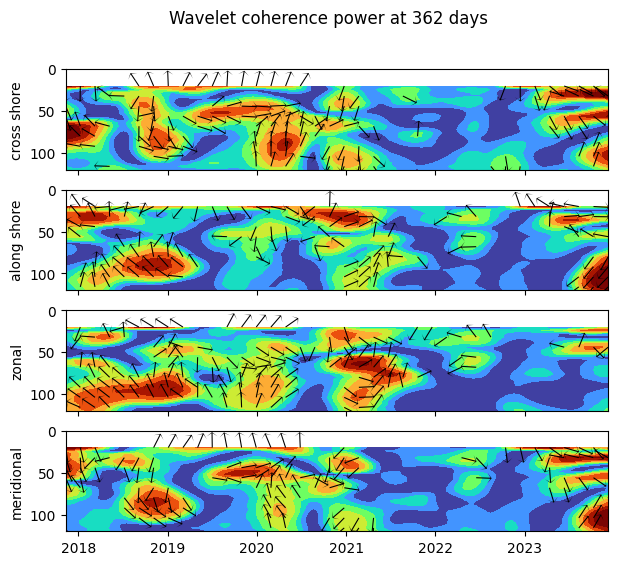

In [57]:
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(7,6),sharex=True,sharey=True)

figcol = ax[0].contourf(ds_cohu[0].time[:].values,np.arange(20,31*4,4),coha_30d,cmap="turbo",levels=np.arange(0,0.9,0.1),extend="both")
ax[1].contourf(ds_cohu[0].time[:].values,np.arange(20,31*4,4),cohc_30d,cmap="turbo",levels=np.arange(0,0.9,0.1),extend="both")
ax[2].contourf(ds_cohu[0].time.values,np.arange(20,31*4,4),cohu_30d,cmap="turbo",levels=np.arange(0,0.9,0.1),extend="both")
ax[3].contourf(ds_cohu[0].time.values,np.arange(20,31*4,4),cohv_30d,cmap="turbo",levels=np.arange(0,0.9,0.1),extend="both")

"""
ax[0].contour(ds_cohu[0].time.values,np.arange(20,31*4,4),coha_30d,levels=[0.5],colors='white')
ax[1].contour(ds_cohu[0].time.values,np.arange(20,31*4,4),cohc_30d,levels=[0.5],colors='white')
ax[2].contour(ds_cohu[0].time.values,np.arange(20,31*4,4),cohu_30d,levels=[0.5],colors='white')
ax[3].contour(ds_cohu[0].time.values,np.arange(20,31*4,4),cohv_30d,levels=[0.5],colors='white')
"""

phaa_30dn = phaa_30d.where(coha_30d > 0.3, np.nan)
angle = 0.5 * np.pi - phaa_30dn
u, v = np.cos(angle), np.sin(angle)
ax[0].quiver(ds_cohu[0].time[::60].values,np.arange(20,31*4,12), u[::3, ::60], v[::3, ::60], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.002,headwidth=10, headlength=4, headaxislength=1,   minshaft=0.05, minlength=2.5)
             

phac_30dn = phac_30d.where(cohc_30d > 0.3, np.nan)
angle = 0.5 * np.pi - phac_30dn
u, v = np.cos(angle), np.sin(angle)
ax[1].quiver(ds_cohu[0].time[::60].values,np.arange(20,31*4,12), u[::3, ::60], v[::3, ::60], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.002,headwidth=10, headlength=4, headaxislength=1,   minshaft=0.05, minlength=2.5)

phau_30dn = phau_30d.where(cohu_30d > 0.3, np.nan)
angle = 0.5 * np.pi - phau_30dn
u, v = np.cos(angle), np.sin(angle)
ax[2].quiver(ds_cohu[0].time[::60].values,np.arange(20,31*4,12), u[::3, ::60], v[::3, ::60], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.002,headwidth=10, headlength=4, headaxislength=1,   minshaft=0.05, minlength=2.5)

phav_30dn = phav_30d.where(cohv_30d > 0.3, np.nan)
angle = 0.5 * np.pi - phav_30dn
u, v = np.cos(angle), np.sin(angle)
ax[3].quiver(ds_cohv[0].time[::60].values,np.arange(20,31*4,12), u[::3, ::60], v[::3, ::60], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.002,headwidth=10, headlength=4, headaxislength=1,   minshaft=0.05, minlength=2.5)


ax[0].set_ylabel("cross shore")
ax[1].set_ylabel("along shore")
ax[2].set_ylabel("zonal")
ax[3].set_ylabel("meridional")


ax[0].set_ylim(ymin=0,ymax=120)
ax[1].invert_yaxis()
fig.suptitle("Wavelet coherence power at 362 days")
plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/wavelet_annual_band.png",dpi=300)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/wavelet_annual_band.png",dpi=300)


In [36]:
#alongshore wavelets
path_coha = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/along/lagged_30days/"
files_coha = sorted([f for f in os.listdir(path_coha) if f.endswith(".nc")])
ds_coha = [xr.open_dataset(path_coha+files_coha[i]) for i in range(len(files_coha))]

#cross shore wavelets
path_cohc = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/cross/lagged_30days/"
files_cohc = sorted([f for f in os.listdir(path_cohc) if f.endswith(".nc")])
ds_cohc = [xr.open_dataset(path_cohc+files_cohc[i]) for i in range(len(files_cohc))]

path = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/coherence_cur_biomass/2mumbai/lagged/wavelet_lag_30days.png"


In [37]:
# index 0f -2 for annual period, 362 days.
coha_30d,phaa_30d = [],[]
for i in range(len(ds_cohc)):
    coha_e = ds_coha[i].coh1[-2,:].values
    phaa_e = ds_coha[i].pha1[-2,:].values
    coha_30d.append(coha_e)
    phaa_30d.append(phaa_e)
    
coha_30d = xr.DataArray(coha_30d)
phaa_30d = xr.DataArray(phaa_30d)

cohc_30d,phac_30d = [],[]
for i in range(len(ds_cohc)):
    cohc_e = ds_cohc[i].coh1[-2,:].values
    phac_e = ds_cohc[i].pha1[-2,:].values
    cohc_30d.append(cohc_e)
    phac_30d.append(phac_e)
    
cohc_30d = xr.DataArray(cohc_30d)
phac_30d = xr.DataArray(phac_30d)


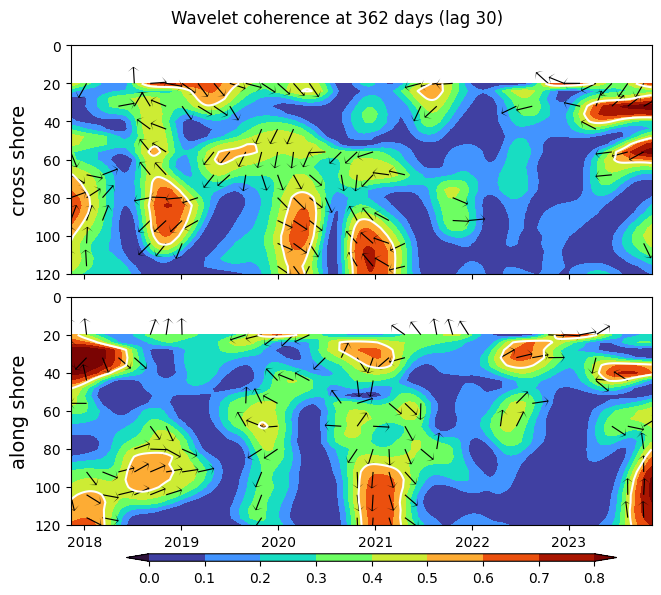

In [38]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(7,6),sharex=True,sharey=True)

plt.subplots_adjust(wspace=0.04,left=0.12,bottom=0.12,top=0.92,hspace=0.1,right = 0.95)

figcol = ax[0].contourf(ds_coha[0].time.values,np.arange(20,31*4,4),coha_30d,cmap="turbo",levels=np.arange(0,0.9,0.1),extend="both")
ax[1].contourf(ds_coha[0].time.values,np.arange(20,31*4,4),cohc_30d,cmap="turbo",levels=np.arange(0,0.9,0.1),extend="both")

ax[0].contour(ds_coha[0].time.values,np.arange(20,31*4,4),coha_30d,levels=[0.5],colors='white')
ax[1].contour(ds_coha[0].time.values,np.arange(20,31*4,4),cohc_30d,levels=[0.5],colors='white')


phaa_30dn = phaa_30d.where(coha_30d > 0.3, np.nan)
angle = 0.5 * np.pi - phaa_30dn
u, v = np.cos(angle), np.sin(angle)
ax[0].quiver(ds_coha[0].time[::60].values,np.arange(20,31*4,12), u[::3, ::60], v[::3, ::60], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.002,headwidth=10, headlength=4, headaxislength=1,   minshaft=0.05, minlength=2.5)
             

phac_30dn = phac_30d.where(cohc_30d > 0.3, np.nan)
angle = 0.5 * np.pi - phac_30dn
u, v = np.cos(angle), np.sin(angle)
ax[1].quiver(ds_coha[0].time[::60].values,np.arange(20,31*4,12), u[::3, ::60], v[::3, ::60], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.002,headwidth=10, headlength=4, headaxislength=1,   minshaft=0.05, minlength=2.5)



ax[0].set_ylabel("cross shore",fontsize=14)
ax[1].set_ylabel("along shore",fontsize=14)


ax[0].set_ylim(ymin=0,ymax=120)
ax[0].invert_yaxis()
fig.suptitle("Wavelet coherence at 362 days (lag 30)")
cax = fig.add_axes([0.2, 0.06, 0.7,0.0125])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal",)

plt.savefig(path,dpi=300)
#plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/wavelet_intra_annual_band_128days.png",dpi=300)
